# Prediction of demand for shared bikes using multiple linear regression model 

# Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Essentially, the company wants —

- To identify the variables affecting the demand of shared bikes.

- To create a linear model that quantitatively relates demand of shared bikes.

- To know the accuracy of the model to meet the demand levels and meet the customer's expectations

#### So interpretation is important!

## The analysis is divided into five main parts:

    1. Reading, Understanding & Visualizing the data.
    2. Preparing the data for modelling (train-test split, rescaling etc).
    3. Training the model.
    4. Residual Analysis.
    5. Predictions & evaluations on the test set.
    6. Calculate the R-squared score on the test set.
  


# EDA

# Data Loading 

### 1. Importing Libraries

In [431]:

# Import the numpy and pandas packages
import numpy as np
import pandas as pd

# Import matplotlin & seaborn for data visualization charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Linear regression libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Show all rows and columns
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

### 2. Load Data set

In [432]:
bikes = pd.read_csv("day.csv")

# Data Understanding

In [433]:
# let's look at the first few rows of the data frame
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [434]:
# Looking at all the columns
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [435]:
# Inspecting the count of rows & columns
bikes.shape

(730, 16)

In [436]:
# Looking at all the columns info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [437]:
# Checking null values
100 * bikes.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [438]:
# Checking unique values
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [439]:
#checking numerical columns statistics
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


As per above outputs, following are the findings:

- 730 rows and 16 columns.
- No null values
- No single values
- TARGET variable/column is 'cnt'
- 'cnt' is a combination of 'casual' & 'registered'
- 'instant' is just a record index, this column can be removed.
- dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday column as it not bringing any new information.
- Based on data dictionary, there seems to be some fields 'weathersit' and 'season that are categorical in nature, but in integer/float type. so we will convert such values into categorical string values before proceeding with model building.


# Data Cleaning & Manipulation

1. To check if there are any headers/footers or summary details rows are there and delete it.
2. Analyze and Resolve Data Type Issues, columns that has mixed data types.
3. Handling Data quality issues (missing value imputation, outlier treatment and other kinds of data redundancies, etc.).   
4. Remove Unnecessary Columns: Columns that do not contribute to the analysis
5. Convert Data Types
6. Creating dummy variables.

### Check for any headers/footers or summary details 


In [440]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We can see that there are no headers or summary row presents from above dataframe. Lets check for footers rows.

In [441]:
bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


From above analysis we can say that there are no Footers, Total, Subtotal rows as well.

### Renaming columns for better visibility

In [442]:
bikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity',
                     'weathersit':'weather','cnt':'count'}, inplace=True)

In [443]:
#checking new names
bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Remove Unnecessary Columns

In [444]:
bikes.drop(['instant'],axis=1,inplace=True)
#dropping instant column as it is merely a index column which has no significance for our target

In [445]:
bikes.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month, year and weekday are covering it

In [446]:
bikes.drop(['casual'],axis=1,inplace=True)
bikes.drop(['registered'],axis=1,inplace=True)
#casual and registered are not useful as the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 
#The model should be built taking this 'cnt' as the target variable.

In [447]:
# Inspecting data after dropping
bikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [448]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.

- #### Binary Types : year, holiday, workingday
- #### Categorical Types: season, month, weekday, weather
- #### Numeric types: temp, atemp, humidity, windspeed, casual, registered, count

In [449]:
# mapping proper names for better visibilty
# season (1:spring, 2:summer, 3:fall, 4:winter)

bikes['season'] = bikes['season'].map({ 1:'spring', 2:'summer', 3:'fall', 4:'winter'})




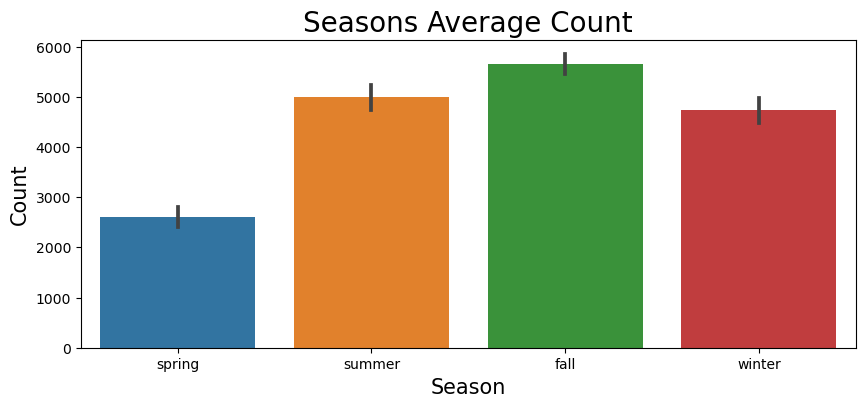

In [450]:
# Visualising Seasons count of rented bikes

plt.figure(figsize=[10, 4])
sns.barplot(x='season', y='count', data=bikes)
plt.title('Seasons Average Count', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Observations:

- In fall, there seems to be highest demand of rented the bikes, followed by Summer and Winter
- Spring seems to be the least season where people rent bikes

In [451]:
# mapping Weather varible proper names for better visibilty

# As per the data dictionary
# weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# however there is no value of 4 in weather column

bikes['weather'] = bikes['weather'].map({ 1:'Clear', 2:'Misty', 3:'Light_Rain', 4:'Heavy_Rain'}) 




In [452]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,1,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


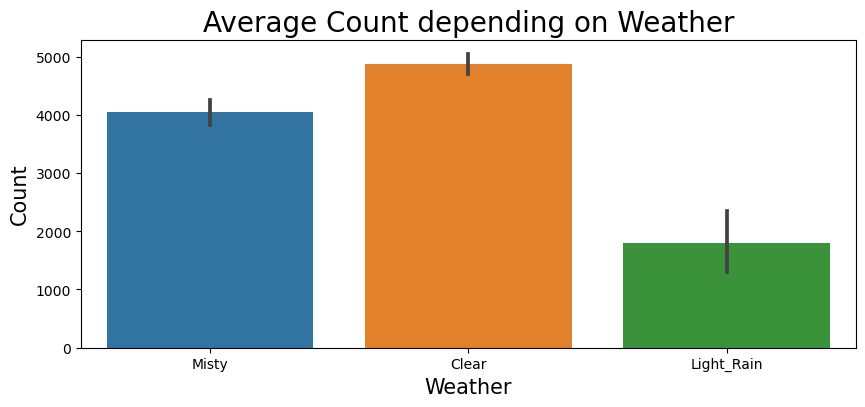

In [453]:
# Visualising count of rented bikes based on daily weather

plt.figure(figsize=[10, 4])
sns.barplot(x='weather', y='count', data=bikes)
plt.title('Average Count depending on Weather', fontsize=20)
plt.xlabel('Weather', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Observations:
- It clearly shows that if the weather is clear, the demand is more
- If the weather is bad, demand decreases drastically

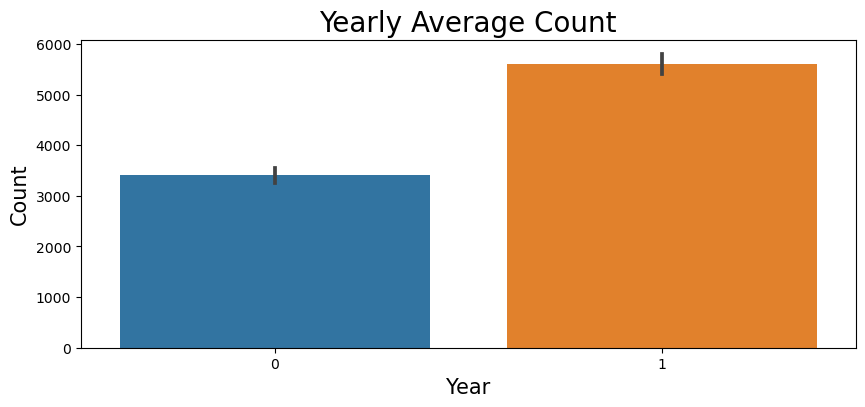

In [454]:
# Visualising Yearly count of rented bikes

plt.figure(figsize=[10, 4])
sns.barplot(x='year', y='count', data=bikes)
plt.title('Yearly Average Count', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Observations:
- We can observe a trend here, average rented bikes has increased in 2019.

In [455]:
# Mapping Month variable proper names for better visibilty

bikes['month'] = bikes['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})




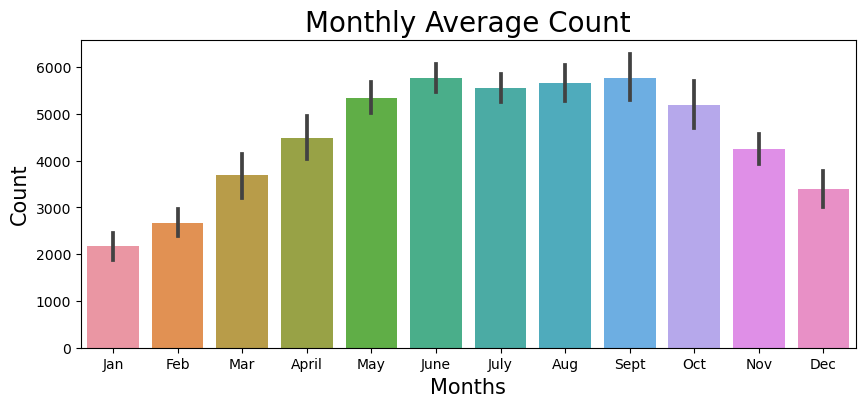

In [456]:
# Visualising Monthly count of rented bikes

plt.figure(figsize=[10, 4])
sns.barplot(x='month', y='count', data=bikes)
plt.title('Monthly Average Count', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Observations:
- High average count of rented bikes in May, June, July, August, September, October. Company should make sure that they are prepred during these months.
- Medium-Low average count in March, April & November.
- least demand in January, February & December.

In [457]:
# mapping weekday variable proper names for better visibilty

bikes['weekday'] = bikes['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})



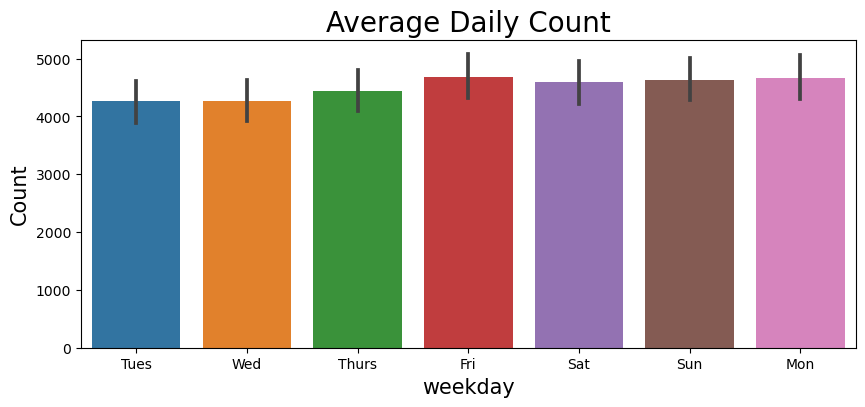

In [458]:
# Visualising Daily count of rented bikes

plt.figure(figsize=[10, 4])
sns.barplot(x='weekday', y='count', data=bikes)
plt.title('Average Daily Count', fontsize=20)
plt.xlabel('weekday', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Observations:
- looks like all days have similar demands, but still Friday, Saturday, Sunday, Monday has high demands than other days
- People less prefer rented bike on Thrusday, Wednesday, Tuesday

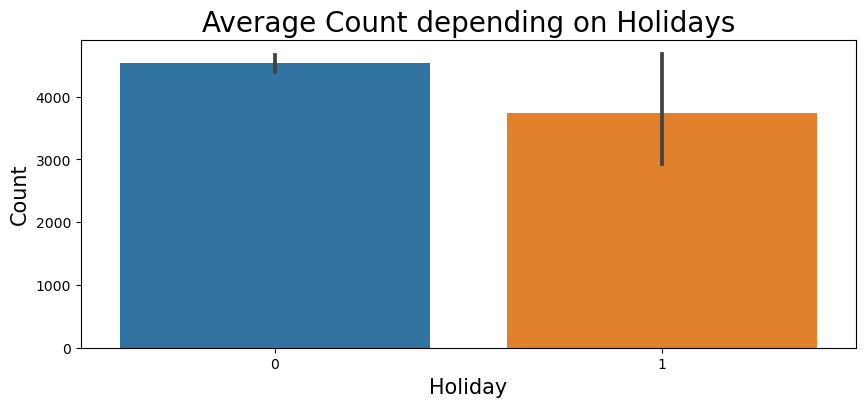

In [459]:
# Visualising Holiday wise count of rented bikes

plt.figure(figsize=[10, 4])
sns.barplot(x='holiday', y='count', data=bikes)
plt.title('Average Count depending on Holidays', fontsize=20)
plt.xlabel('Holiday', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Observations:
- There is high decrease of demand if it is a holiday.

In [460]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Tues,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Thurs,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Numerical Variables.

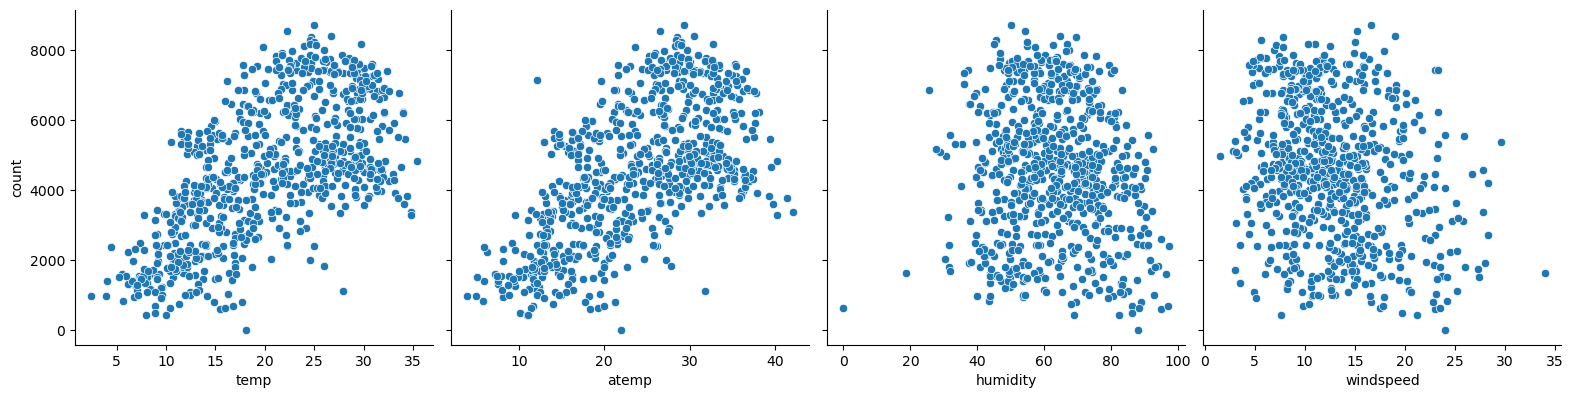

In [461]:
sns.pairplot(bikes, x_vars=['temp','atemp','humidity','windspeed'], y_vars='count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

### Observations:
- as can be seen from above plots, there is some linear relation between temp, atemp with Count.**

## Data preparation for linear regression

In [462]:
bikes = pd.get_dummies(data=bikes,columns=["season","month","weekday","weather"],drop_first=True)


In [463]:
bikes.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'weather_Light_Rain',
       'weather_Misty'],
      dtype='object')

In [464]:
bikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weather_Light_Rain,weather_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [465]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   humidity            730 non-null    float64
 6   windspeed           730 non-null    float64
 7   count               730 non-null    int64  
 8   season_spring       730 non-null    bool   
 9   season_summer       730 non-null    bool   
 10  season_winter       730 non-null    bool   
 11  month_Aug           730 non-null    bool   
 12  month_Dec           730 non-null    bool   
 13  month_Feb           730 non-null    bool   
 14  month_Jan           730 non-null    bool   
 15  month_July          730 non-null    bool   
 16  month_Ju

In [466]:
# Convert boolean columns to integer (0 and 1)
for col in bikes.select_dtypes(include=['bool']).columns:
    bikes[col] = bikes[col].astype(int)

In [467]:
bikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weather_Light_Rain,weather_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Splitting data into train and test data

In [468]:
bikes.shape

(730, 30)

In [469]:
#y to contain only target variable
y=bikes.pop('count')

#X is all remaining variable also our independent variables
X=bikes

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [470]:
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weather_Light_Rain,weather_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [471]:
bikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weather_Light_Rain,weather_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [472]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [473]:
# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [474]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weather_Light_Rain,weather_Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.133072,0.150685,0.142857,0.133072,0.148728,0.156556,0.029354,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.339986,0.358092,0.350270,0.339986,0.356169,0.363738,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [475]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weather_Light_Rain,weather_Misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


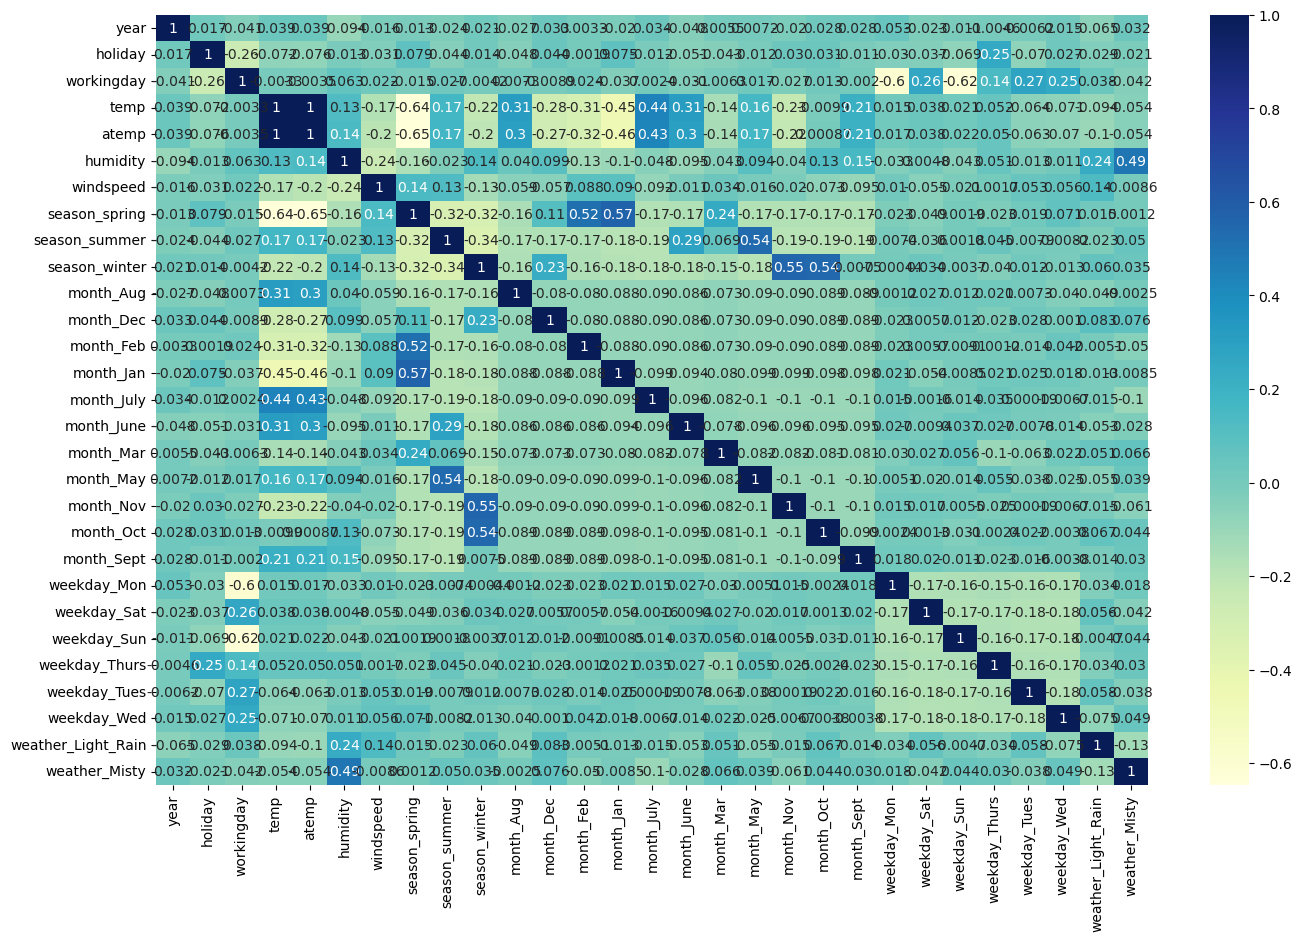

In [476]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Build model using RFE

In [477]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [478]:
#Cut down number of features to 15 using automated approach

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_July',
       'month_Mar', 'month_Nov', 'month_Sept', 'weather_Light_Rain',
       'weather_Misty'],
      dtype='object')


In [479]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('month_Aug', False, 11),
 ('month_Dec', True, 1),
 ('month_Feb', False, 8),
 ('month_Jan', False, 14),
 ('month_July', True, 1),
 ('month_June', False, 9),
 ('month_Mar', True, 1),
 ('month_May', False, 2),
 ('month_Nov', True, 1),
 ('month_Oct', False, 3),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', False, 15),
 ('weekday_Sun', False, 13),
 ('weekday_Thurs', False, 5),
 ('weekday_Tues', False, 4),
 ('weekday_Wed', False, 6),
 ('weather_Light_Rain', True, 1),
 ('weather_Misty', True, 1)]

In [480]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [481]:
#Function to calculate VIFs and print them - Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [482]:
#Print Columns selected by RFE. 
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Dec', 'month_July',
       'month_Mar', 'month_Nov', 'month_Sept', 'weather_Light_Rain',
       'weather_Misty'],
      dtype='object')

In [483]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'month_Aug', 'month_Feb', 'month_Jan',
       'month_June', 'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [484]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Jan', 'month_July', 'month_Sept', 'weekday_Sat',
       'weather_Light_Rain', 'weather_Misty']]

In [485]:
X_train_rfe.shape


(511, 15)

### Model-1

In [486]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Jan', 'month_July', 'month_Sept', 'weekday_Sat',
       'weather_Light_Rain', 'weather_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.29e-182
Time:                        21:52:25   Log-Likelihood:                -4133.9
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     495   BIC:                             8367.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2739.1446    338

### Model-2

In [487]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_July', 'month_Sept', 'weekday_Sat',
       'weather_Light_Rain', 'weather_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.90e-183
Time:                        21:53:38   Log-Likelihood:                -4133.9
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     496   BIC:                             8361.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2724.5504    335

### Model-3

In [488]:
# Dropping the variable humidity as it has negative coefficient, low p-value and high VIF stating multicollinearity
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_July', 'month_Sept', 'weekday_Sat',
       'weather_Light_Rain', 'weather_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.22e-181
Time:                        21:56:50   Log-Likelihood:                -4141.9
No. Observations:                 511   AIC:                             8312.
Df Residuals:                     497   BIC:                             8371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1964.6562    279

### Model-4

In [489]:
# Dropping the variable month_jul as it has as it has negative coefficient and  high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Sept', 'weekday_Sat',
       'weather_Light_Rain', 'weather_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.67e-181
Time:                        22:03:50   Log-Likelihood:                -4143.9
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     498   BIC:                             8369.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1905.6681    278

### Model-5

In [490]:
# Dropping the variable weekday_Sat as it has a high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Sept','weather_Light_Rain', 'weather_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.25e-181
Time:                        22:15:58   Log-Likelihood:                -4145.5
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     499   BIC:                             8366.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1918.9292    279

### Model-6

In [491]:
# Dropping the variable windspeed as it has a high VIF
cols = ['year', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'month_Sept','weather_Light_Rain', 'weather_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.70e-179
Time:                        22:20:28   Log-Likelihood:                -4153.4
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     500   BIC:                             8375.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1500.5024    262

### Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.82
### Hence we finalize this model to use further

In [492]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [494]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1500.5024389131122 [ 1989.45381428  -825.23454868  -204.12695705  4091.51711769
  -744.17786846   462.12893069   865.51084562   733.22170346
 -2289.06746494  -678.42373184]


# Residual Analysis

In [495]:
y_train_pred = lr.predict(X_train[cols])

In [496]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

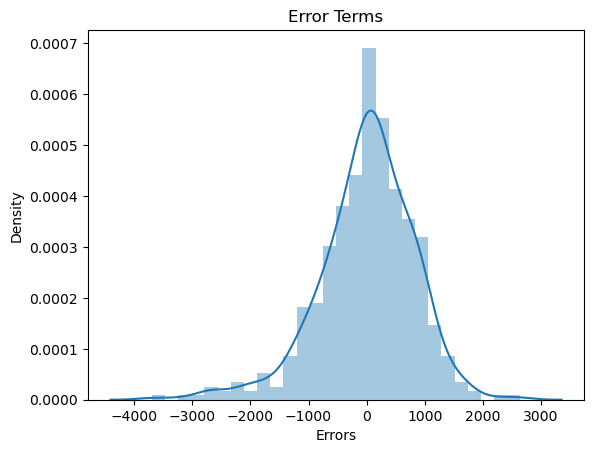

In [497]:
plot_res_dist(y_train, y_train_pred)

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Model Predictions

In [500]:
## R-Squared value for train predictions
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8207866077552256

### Prediction of values on test dataset

In [501]:
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [502]:
cols = ['year', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'month_Sept','weather_Light_Rain', 'weather_Misty']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [503]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.814144319830573

In [504]:
y_pred=y_test_pred

# Evaluating the model

### Evaluating the model based on r2_score(as suggested to perform in the problem statement on upgrad portal)


In [505]:
r2_score(y_test, y_pred)

0.814144319830573

Text(0, 0.5, 'y_pred')

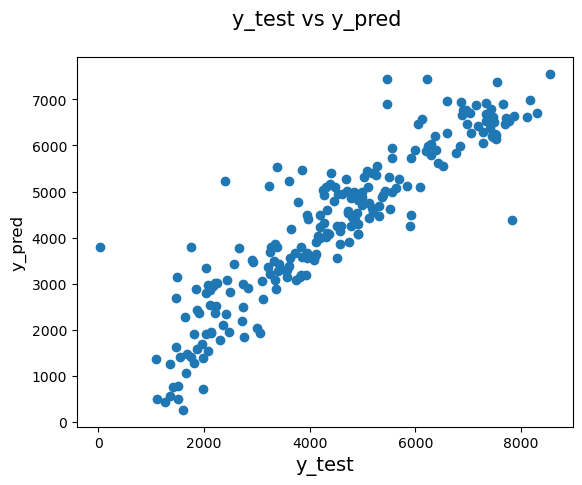

In [506]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [508]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['year', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'month_Sept','weather_Light_Rain', 'weather_Misty']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.70e-179
Time:                        22:46:40   Log-Likelihood:                -4153.4
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     500   BIC:                             8375.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1500.5024    262

### Conclusion
Significant variables to predict the demand for shared bikes

- year
- holiday
- workingday
- temp
- season_spring
- season_summer
- season_winter
- month_Sept  
- weather_Light_Rain 
- weather_Misty       